#  Part Time Data Science: APIs

---

<a id="learning-objectives"></a>
## Learning Objectives
*After completing this notebook, you will be able to:*

- Make API requests and convert the results into a Pandas dataframe
- Use APIs together with API keys
- Understand API documentation and use this to make customised requests

<a id="apis"></a>

# <font color='blue'> APIs 

In this example, we're requesting data from this API: https://covid19api.com/ 

Take a few moments to read through some of the information on this site and figure out:

* Where this API gets its data from (and whether it's a reputable source)
* How we can access the documentation that tells us how the API works
* Whether the API is free


Let's start by importing the **requests** library, which we'll be using to make API requests.

In [1]:
import requests

Let's make a request to the coronavirus API and view the resulting JSON. The first thing we do is make a GET request. This is really simple!

In [2]:
covid_request = requests.get('https://api.covid19api.com/summary')

The thing we get back from a GET request is a `request` object.

In [6]:
type(covid_request)

requests.models.Response

This is an object that has a few different bits of information bundled up inside it, all of which have been sent back to us by the servers, including...

The status code, which tells us whether the request was successful or not. A status code of `200` means the request was a success, whereas a status code of `400` means there was an error. You might remember seeing `404: error` messages in your browser when you try to load a webpage that doesn't exist- that's also an example of a status code! 

We can check the status code like this:

In [7]:
covid_request.status_code

200

We can also access the JSON that's returned by the API; this is also bundled up inside our `request` object.

In [9]:
covid_request.json()

{'ID': 'd6eee518-8980-4a79-931c-3ac1b623a496',
 'Message': '',
 'Global': {'NewConfirmed': 179691,
  'TotalConfirmed': 198070353,
  'NewDeaths': 2486,
  'TotalDeaths': 4221856,
  'NewRecovered': 89574,
  'TotalRecovered': 129962690,
  'Date': '2021-08-02T17:31:25.955Z'},
 'Countries': [{'ID': '0b3d3dd8-0654-4879-958e-e99e4b3c3f85',
   'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 0,
   'TotalConfirmed': 146523,
   'NewDeaths': 0,
   'TotalDeaths': 6677,
   'NewRecovered': 0,
   'TotalRecovered': 82586,
   'Date': '2021-08-02T17:31:25.955Z',
   'Premium': {}},
  {'ID': '933c0c8d-4bd6-4fc0-8397-c05bb1b4371e',
   'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 0,
   'TotalConfirmed': 133121,
   'NewDeaths': 0,
   'TotalDeaths': 2457,
   'NewRecovered': 0,
   'TotalRecovered': 130243,
   'Date': '2021-08-02T17:31:25.955Z',
   'Premium': {}},
  {'ID': '3a0e1db7-3f3e-47e0-922e-85c3116a385e',
   'Country':

Let's create a variable that contains the JSON only.

In [10]:
covid_json = covid_request.json()
covid_json

{'ID': 'd6eee518-8980-4a79-931c-3ac1b623a496',
 'Message': '',
 'Global': {'NewConfirmed': 179691,
  'TotalConfirmed': 198070353,
  'NewDeaths': 2486,
  'TotalDeaths': 4221856,
  'NewRecovered': 89574,
  'TotalRecovered': 129962690,
  'Date': '2021-08-02T17:31:25.955Z'},
 'Countries': [{'ID': '0b3d3dd8-0654-4879-958e-e99e4b3c3f85',
   'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 0,
   'TotalConfirmed': 146523,
   'NewDeaths': 0,
   'TotalDeaths': 6677,
   'NewRecovered': 0,
   'TotalRecovered': 82586,
   'Date': '2021-08-02T17:31:25.955Z',
   'Premium': {}},
  {'ID': '933c0c8d-4bd6-4fc0-8397-c05bb1b4371e',
   'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 0,
   'TotalConfirmed': 133121,
   'NewDeaths': 0,
   'TotalDeaths': 2457,
   'NewRecovered': 0,
   'TotalRecovered': 130243,
   'Date': '2021-08-02T17:31:25.955Z',
   'Premium': {}},
  {'ID': '3a0e1db7-3f3e-47e0-922e-85c3116a385e',
   'Country':

Let's check it's type- it's a dictionary!

In [11]:
type(covid_json)

dict

Now we can use our dictionary and list-indexing skills to access information inside the JSON.

In [12]:
covid_json['Global']

{'NewConfirmed': 179691,
 'TotalConfirmed': 198070353,
 'NewDeaths': 2486,
 'TotalDeaths': 4221856,
 'NewRecovered': 89574,
 'TotalRecovered': 129962690,
 'Date': '2021-08-02T17:31:25.955Z'}

In [13]:
covid_json['Global']['NewConfirmed']

179691

---
## <font color='red'> Exercise: Coronavirus API

Have a read through the API documentation here: 
    
https://documenter.getpostman.com/view/10808728/SzS8rjbc
    
Can you figure out which **endpoint** or URL you need to get daily coronavirus figures for **Germany only**, without having to specify a time or date range?

In [18]:
germany_request = requests.get('https://api.covid19api.com/country/germany')
germany_request


<Response [200]>

Now, check the status code of the request:

In [19]:
germany_request.status_code

200

Next, create a variable that contains the JSON returned by the API.

In [21]:
germany_json = germany_request.json()

Working with JSON and dictionaries is great because it's very standardised, but it's not a very pretty data format to work with. 

Ideally we want a way of working with data in Python that's as visually nice to work with as a table in Excel but less useless. 

This is where the ```pandas``` library comes in. This is the most widely used library for cleaning (sometimes called ***parsing*** or ***wrangling***) data in Python. 

```pandas``` introduces some new types, the most important of which is the ```DataFrame```.

You can think of a ```DataFrame``` as being like a Python version of an Excel table. It's a way of storing data that lets us easily manipulate, clean and perform calculations with our data. 

Let's take a look at how easy it is to convert JSON/dictionaries into a ```DataFrame```.

In [22]:
import pandas as pd

In [23]:
germany_data = pd.DataFrame(germany_json)
germany_data.head()

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,5c2374a0-da0d-4797-b45b-6bd09f3c37e1,Germany,DE,,,,51.17,10.45,0,0,0,0,2020-01-22T00:00:00Z
1,eab817af-f14e-4601-84f3-aa2c8644cc9a,Germany,DE,,,,51.17,10.45,0,0,0,0,2020-01-23T00:00:00Z
2,17d5f918-f2e8-405d-a9ee-b67ada3f876f,Germany,DE,,,,51.17,10.45,0,0,0,0,2020-01-24T00:00:00Z
3,6896a4b4-6fa0-44f0-8d20-ef17ff21cb78,Germany,DE,,,,51.17,10.45,0,0,0,0,2020-01-25T00:00:00Z
4,f890e786-0c01-43d6-bef4-d71d550649b5,Germany,DE,,,,51.17,10.45,0,0,0,0,2020-01-26T00:00:00Z


In [26]:
germany_data.Date

0      2020-01-22T00:00:00Z
1      2020-01-23T00:00:00Z
2      2020-01-24T00:00:00Z
3      2020-01-25T00:00:00Z
4      2020-01-26T00:00:00Z
               ...         
553    2021-07-28T00:00:00Z
554    2021-07-29T00:00:00Z
555    2021-07-30T00:00:00Z
556    2021-07-31T00:00:00Z
557    2021-08-01T00:00:00Z
Name: Date, Length: 558, dtype: object

We'll be learning a lot more about Pandas, but for now it's enough to know what a ```DataFrame``` is. The ```head()``` function shows us a preview of the first five rows of a ```DataFrame```.

## <font color='green'> Solutions: Coronavirus API

By reading the documentation, we can figure out that the endpoint we want is 'By Country Total All Status'.

The example URL given in the documentation is an endpoint that will return data for South Africa: 
`https://api.covid19api.com/total/country/south-africa`

We of course need to change this to get data for Germany, so the URL for our API request looks like this:

`https://api.covid19api.com/total/country/germany`

Now we can make a `GET` request to this URL just like we did before.

In [29]:
germany_request = requests.get('https://api.covid19api.com/total/country/germany')
germany_request


<Response [200]>

Now, check the status code of the request:

In [ ]:
germany_request.status_code

Next, create a variable that contains the JSON returned by the API.

In [ ]:
germany_json = germany_request.json() 

In [ ]:
import pandas as pd

In [ ]:
germany_data = pd.DataFrame(germany_json)
germany_data.head()

---

## <font color='red'> Exercise: For loops
    
We know how to make an API request to get covid data for a single country, using the API at https://covid19api.com/. We use this URL and change the name of the country:

`https://api.covid19api.com/total/country/germany`

What if we wanted to make several API requests for multiple countries? We could do it the long way round...Or we could use a `for` loop! Let's do this now.

First, write a `for` loop that will print out the URL needed to request covid data for each of the following countries in turn: (**hint: you'll need to perform some string concatenation**)


* Switzerland
* Austria
* Brazil
* Turkey
* Germany

In [43]:
countries = ['Switzerland','Austria','Brazil','Turkey','Germany']

for country in countries:
    print(requests.get(f'https://api.covid19api.com/total/country/{country}'))

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


Now edit this loop, so that for each country you make an API request and get JSON data- store this in a variable called `country_json` but don't worry about printing anything out this time.

In [45]:
for country in countries:
    country_json = requests.get(f'https://api.covid19api.com/total/country/{country}').json()

Now, can you extract the latest day's worth of data from the JSON? Create a variable in your loop called `latest_json` to hold this. 

Remember to preview the data returned from your API requests in your browser before writing any Python code- this will help you to understand what you're doing.

You'll also need to figure out whether the information you want is nested inside a list, a dictionary, or a combination fo the two. 

In [46]:
for country in countries:
    country_json = requests.get(f'https://api.covid19api.com/total/country/{country}').json()
    latest_json = country_json[-1]
latest_json

{'Country': 'Germany',
 'CountryCode': '',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '0',
 'Lon': '0',
 'Confirmed': 3778277,
 'Deaths': 91666,
 'Recovered': 3654720,
 'Active': 31891,
 'Date': '2021-08-01T00:00:00Z'}

You'll notice that the format of your `latest_json` variable is a bit like this:

```{'Country': 'Germany',
 'CountryCode': '',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '0',
 'Lon': '0',
 'Confirmed': 3706934,
 'Deaths': 89228,
 'Recovered': 3538290,
 'Active': 79416,
 'Date': '2021-06-05T00:00:00Z'}```
 
Create two more variables in your loop to hold these 2 pieces of information, which you should extract from `latest_json`:

* The date of the latest data, in the format `yyyy-mm-dd`
* The total number of confirmed coronavirus cases

In [59]:
for country in countries:
    country_json = requests.get(f'https://api.covid19api.com/total/country/{country}').json()
    latest_json = country_json[-1]
    date = latest_json['Date'][:10]
    cases = latest_json['Confirmed']
print(date)
cases

2021-08-01


3778277

Finally, edit the loop so that for each country, you print out the **latest** number of total cases in that country as part of a message like "The total number of covid cases in Germany as of 2021-06-05 was 3706934."


In [ ]:
for country in countries:
    country_json = requests.get(f'https://api.covid19api.com/total/country/{country}').json()
    latest_json = country_json[-1]
    print(latest_json['Date'][:10]
    cases = latest_json['Confirmed']
print(date)
cases
    

**Stretch**

Let's take another quick look at Pandas and try converting the data we've collected into a Pandas `DataFrame`.

To start with, modify your loop _again_ so this time, you're creating a list called `country_cases` and appending the different case numbers to it each time you use the loop.

Remember to initialise your list before you write your loop.

We now have a list of case numbers and a corresponding list of country names. Let's turn this into a DataFrame called `cases_by_country_df` by running this cell:

In [ ]:
import pandas as pd

cases_by_country_df = pd.DataFrame({'country':['switzerland','austria','brazil','turkey','germany'],
             'total_cases':country_cases})

As before, we can view the DataFrame...

In [ ]:
cases_by_country_df

And we can also easily save it as a CSV file. Run this cell and see how the new CSV file pops up in your current folder.

In [ ]:
cases_by_country_df.to_csv('cases_by_country.csv',index=False)

**Further discussion**

We've just made a lot of successive API requests. Ask your instructor about the `time.sleep()` function and why we might choose to use it in this situation.

## <font color='green'> Solution: For loops
    
We know how to make an API request to get covid data for a single country. We use this URL and change the name of the country:

`https://api.covid19api.com/total/country/germany`

What if we wanted to make several API requests for multiple countries? We could do it the long way round...Or we could use a `for` loop! Let's do this now.

First, write a `for` loop that will print out the URL needed to request covid data for each of the following countries in turn:


* Switzerland
* Austria
* Brazil
* Turkey
* Germany

In [ ]:
for country in ['switzerland','austria','brazil','turkey','germany']:
    
    print('https://api.covid19api.com/total/country/'+country)

Now edit this loop, so that for each country you make an API request and get JSON data- store this in a variable called `country_json` but don't worry about printing anything out this time.

In [ ]:
import requests

for country in ['switzerland','austria','brazil','turkey','germany']:
    
    country_json = requests.get('https://api.covid19api.com/total/country/'+country).json()


Now, can you extract the latest day's worth of data from the JSON? Create a variable in your loop called `latest_json` to hold this. 

Remember to preview the data returned from your API requests in your browser before writing any Python code- this will help you to understand what you're doing.

You'll also need to figure out whether the information you want is nested inside a list, a dictionary, or a combination fo the two. 

In [ ]:
for country in ['switzerland','austria','brazil','turkey','germany']:
    
    country_json = requests.get('https://api.covid19api.com/total/country/'+country).json()
    latest_json = country_json[-1]

You'll notice that the format of your `latest_json` variable is a bit like this:

```{'Country': 'Germany',
 'CountryCode': '',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '0',
 'Lon': '0',
 'Confirmed': 3706934,
 'Deaths': 89228,
 'Recovered': 3538290,
 'Active': 79416,
 'Date': '2021-06-05T00:00:00Z'}```
 
Create two more variables in your loop to hold these 2 pieces of information, which you should extract from `latest_json`:

* The date of the latest data, in the format `yyyy-mm-dd`
* The total number of confirmed coronavirus cases

In [ ]:
for country in ['switzerland','austria','brazil','turkey','germany']:
    
    country_json = requests.get('https://api.covid19api.com/total/country/'+country).json()
    latest_json = country_json[-1]
    
    date = latest_json['Date'].split('T')[0]
    cases = latest_json['Confirmed']
    

Finally, edit the loop so that for each country, you print out the **latest** number of total cases in that country as part of a message like "The total number of covid cases in Germany as of 2021-06-05 was 3706934."


In [ ]:
for country in ['switzerland','austria','brazil','turkey','germany']:
    
    country_json = requests.get('https://api.covid19api.com/total/country/'+country).json()
    latest_json = country_json[-1]
    
    date = latest_json['Date'].split('T')[0]
    cases = latest_json['Confirmed']
    
    print('The total number of covid cases in ',country.capitalize(),' as of ',date,' is ',cases)
    

**Stretch**

Let's take another quick look at Pandas and try converting the data we've collected into a Pandas `DataFrame`.

To start with, modify your loop _again_ so this time, you're creating a list called `country_cases` and appending the different case numbers to it each time you use the loop.

Remember to initialise your list before you write your loop.

In [ ]:
country_cases = []

for country in ['switzerland','austria','brazil','turkey','germany']:
    
    country_json = requests.get('https://api.covid19api.com/total/country/'+country).json()
    latest_json = country_json[-1]
    
    date = latest_json['Date'].split('T')[0]
    cases = latest_json['Confirmed']
    
    country_cases.append(cases)
    
    print('The total number of covid cases in ',country.capitalize(),' as of ',date,' is ',cases)

We now have a list of case numbers and a corresponding list of country names. Let's turn this into a DataFrame called `cases_by_country_df` by running this cell:

In [ ]:
import pandas as pd

cases_by_country_df = pd.DataFrame({'country':['switzerland','austria','brazil','turkey','germany'],
             'total_cases':country_cases})

As before, we can view the DataFrame...

In [ ]:
cases_by_country_df

And we can also easily save it as a CSV file. Run this cell and see how the new CSV file pops up in your current folder.

In [ ]:
cases_by_country_df.to_csv('cases_by_country.csv',index=False)

---
## <font color='red'> Exercise: If statements
    
Let's try to incorporate an `if` statement into our API request. Can you write an API request combined with an `if` statement, to do the following:

* Get the total number of coronavirus cases in Switzerland
* If the number of cases is greater than 500,000 print the message "Over half a million cases in Switzerland"
* Otherwise, print the message "Under half a million cases in Switzerland"

In [67]:
switzerland_json = requests.get('https://api.covid19api.com/total/country/switzerland').json()
if switzerland_json[-1]['Confirmed'] > 500000:
    print("over")
else:
    print("under")

over


**Stretch**

Get the number of total coronavirus cases in Switzerland and France. If the total number of cases in France is higher, print the message "France has had more covid cases than Switzerland" otherwise print "Switzerland has had more covid cases than France"


## <font color='green'> Solution: If statements
    
Let's try to incorporate an `if` statement into our API request. Can you write an API request combined with an `if` statement, to do the following:

* Get the total number of coronavirus cases in Switzerland
* If the number of cases is greater than 500,000 print the message "Over half a million cases in Switzerland"
* Otherwise, print the message "Under half a million cases in Switzerland"

In [ ]:
import requests

switzerland_json = requests.get('https://api.covid19api.com/total/country/switzerland').json()
switzerland_cases = switzerland_json[-1]['Confirmed']

if switzerland_cases>500000:
    print("Over half a million cases")
else:
    print("Under half a million cases")


**Stretch**

Get the number of total coronavirus cases in Switzerland and France. If the total number of cases in France is higher, print the message "France has had more covid cases than Switzerland" otherwise print "Switzerland has had more covid cases than France"


In [ ]:
switzerland_json = requests.get('https://api.covid19api.com/total/country/switzerland').json()
switzerland_cases = switzerland_json[-1]['Confirmed']

france_json = requests.get('https://api.covid19api.com/total/country/france').json()
france_cases = france_json[-1]['Confirmed']

if france_cases>switzerland_cases:
    print("France has more cases than Switzerland")
else:
    print("Switzerland has more cases than France")

<a id="numbers"></a>

# <font color='blue'> Further API examples 

We're going to grab real time share price data from AlphaVantage (https://www.alphavantage.co/documentation/).
    
Let's start by importing the **requests** library, which we'll be using to make API requests

In [142]:
import requests

Let's make a request to the share price API and view the resulting JSON. The first thing we do is make a GET request. This is really simple!

In [76]:
share_price_request = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=2YGHAMCQGVT1XIAE')
api_key = '2YGHAMCQGVT1XIAE'


The thing we get back from a GET request is a `request` object.

In [77]:
type(share_price_request)

requests.models.Response

In [78]:
share_price_request.status_code

200

This is an object that has a few different bits of information bundled up inside it, all of which have been sent back to us by the servers at `alphavantage.co`, including...

The status code, which tells us whether the request was successful or not. A status code of `200` means the request was a success, whereas a status code of `400` means there was an error. You might remember seeing `404: error` messages in your browser when you try to load a webpage that doesn't exist- that's also an example of a status code! 

We can check the status code like this:

In [79]:
share_price_request.status_code

200

We can also access the JSON that's returned by the API; this is also bundled up inside our `request` object.

In [80]:
share_price_request.json()

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
  '2. Symbol': 'TSLA',
  '3. Last Refreshed': '2021-07-30 20:00:00',
  '4. Interval': '5min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (5min)': {'2021-07-30 20:00:00': {'1. open': '687.2300',
   '2. high': '688.0000',
   '3. low': '687.1900',
   '4. close': '687.5800',
   '5. volume': '9216'},
  '2021-07-30 19:55:00': {'1. open': '688.3500',
   '2. high': '688.4001',
   '3. low': '687.5000',
   '4. close': '687.5000',
   '5. volume': '6998'},
  '2021-07-30 19:50:00': {'1. open': '688.5500',
   '2. high': '688.7000',
   '3. low': '688.1200',
   '4. close': '688.4800',
   '5. volume': '6505'},
  '2021-07-30 19:45:00': {'1. open': '688.7500',
   '2. high': '688.7500',
   '3. low': '688.5100',
   '4. close': '688.5800',
   '5. volume': '1859'},
  '2021-07-30 19:40:00': {'1. open': '688.5000',
   '2. high': '688.7500',
   '3. low': '688.5000',
   '4. close': '688

Let's create a variable that contains the JSON only.

In [81]:
share_price_json = share_price_request.json()
share_price_json

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
  '2. Symbol': 'TSLA',
  '3. Last Refreshed': '2021-07-30 20:00:00',
  '4. Interval': '5min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (5min)': {'2021-07-30 20:00:00': {'1. open': '687.2300',
   '2. high': '688.0000',
   '3. low': '687.1900',
   '4. close': '687.5800',
   '5. volume': '9216'},
  '2021-07-30 19:55:00': {'1. open': '688.3500',
   '2. high': '688.4001',
   '3. low': '687.5000',
   '4. close': '687.5000',
   '5. volume': '6998'},
  '2021-07-30 19:50:00': {'1. open': '688.5500',
   '2. high': '688.7000',
   '3. low': '688.1200',
   '4. close': '688.4800',
   '5. volume': '6505'},
  '2021-07-30 19:45:00': {'1. open': '688.7500',
   '2. high': '688.7500',
   '3. low': '688.5100',
   '4. close': '688.5800',
   '5. volume': '1859'},
  '2021-07-30 19:40:00': {'1. open': '688.5000',
   '2. high': '688.7500',
   '3. low': '688.5000',
   '4. close': '688

Let's check it's type- it's a dictionary!

In [82]:
type(share_price_json)

dict

Now we can use our dictionary and list-indexing skills to access information inside the JSON.

In [86]:
share_price_json['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2021-07-30 20:00:00',
 '4. Interval': '5min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [87]:
share_price_json['Time Series (5min)']

{'2021-07-30 20:00:00': {'1. open': '687.2300',
  '2. high': '688.0000',
  '3. low': '687.1900',
  '4. close': '687.5800',
  '5. volume': '9216'},
 '2021-07-30 19:55:00': {'1. open': '688.3500',
  '2. high': '688.4001',
  '3. low': '687.5000',
  '4. close': '687.5000',
  '5. volume': '6998'},
 '2021-07-30 19:50:00': {'1. open': '688.5500',
  '2. high': '688.7000',
  '3. low': '688.1200',
  '4. close': '688.4800',
  '5. volume': '6505'},
 '2021-07-30 19:45:00': {'1. open': '688.7500',
  '2. high': '688.7500',
  '3. low': '688.5100',
  '4. close': '688.5800',
  '5. volume': '1859'},
 '2021-07-30 19:40:00': {'1. open': '688.5000',
  '2. high': '688.7500',
  '3. low': '688.5000',
  '4. close': '688.6000',
  '5. volume': '3342'},
 '2021-07-30 19:35:00': {'1. open': '688.3700',
  '2. high': '688.4500',
  '3. low': '688.1200',
  '4. close': '688.4500',
  '5. volume': '2133'},
 '2021-07-30 19:30:00': {'1. open': '688.1000',
  '2. high': '688.1000',
  '3. low': '688.1000',
  '4. close': '688.10

In [89]:
pd.DataFrame(share_price_json['Time Series (5min)']).transpose()

,1. open,2. high,3. low,4. close,5. volume
2021-07-30 20:00:00,687.2300,688.0000,687.1900,687.5800,9216
2021-07-30 19:55:00,688.3500,688.4001,687.5000,687.5000,6998
2021-07-30 19:50:00,688.5500,688.7000,688.1200,688.4800,6505
2021-07-30 19:45:00,688.7500,688.7500,688.5100,688.5800,1859
2021-07-30 19:40:00,688.5000,688.7500,688.5000,688.6000,3342
...,...,...,...,...,...
2021-07-30 11:55:00,690.9000,691.8600,689.7300,690.3974,295521
2021-07-30 11:50:00,690.2705,691.3000,690.0000,690.8500,276675
2021-07-30 11:45:00,689.2500,690.3799,687.9800,690.3200,254429
2021-07-30 11:40:00,687.5900,689.5400,687.4800,689.2700,241673


---
## <font color='red'> Exercise: Share price API

Have a read through the API documentation here: 
    
https://www.alphavantage.co/documentation/
    
Can you figure out which **endpoint** or URL you need to get **daily** share prices for **Google** at **5 minute intervals**?
    
To do this, you'll need to sign up for an API key using this link: https://www.alphavantage.co/support/#api-key

(the 'demo' key we used in the previous example won't work)

In [143]:
import pandas as pd

In [127]:
api_key = '2YGHAMCQGVT1XIAE'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min'


In [144]:
tesla_request = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=2YGHAMCQGVT1XIAE')

Now, check the status code of the request:

In [145]:
tesla_request

<Response [200]>

Next, create a variable that contains the JSON returned by the API.

In [146]:
tesla_json = tesla_request.json()

Use your Pandas knowledge to convert this into a Pandas dataframe and calculate the average opening share price.

In [148]:
df = pd.DataFrame(tesla_json['Time Series (5min)']).transpose()

In [149]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
2021-08-02 20:00:00,713.9300,714.9900,713.7500,714.9900,11154
2021-08-02 19:55:00,713.3400,713.9900,713.2700,713.9900,6144
2021-08-02 19:50:00,714.1400,714.1400,713.0000,713.2500,11566
2021-08-02 19:45:00,713.8800,714.0500,713.5000,714.0200,7212
2021-08-02 19:40:00,714.1500,714.1500,713.8900,714.0000,6832


In [150]:
df.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [152]:
df['4. close'] = pd.to_numeric(df['4. close'])

<AxesSubplot:>

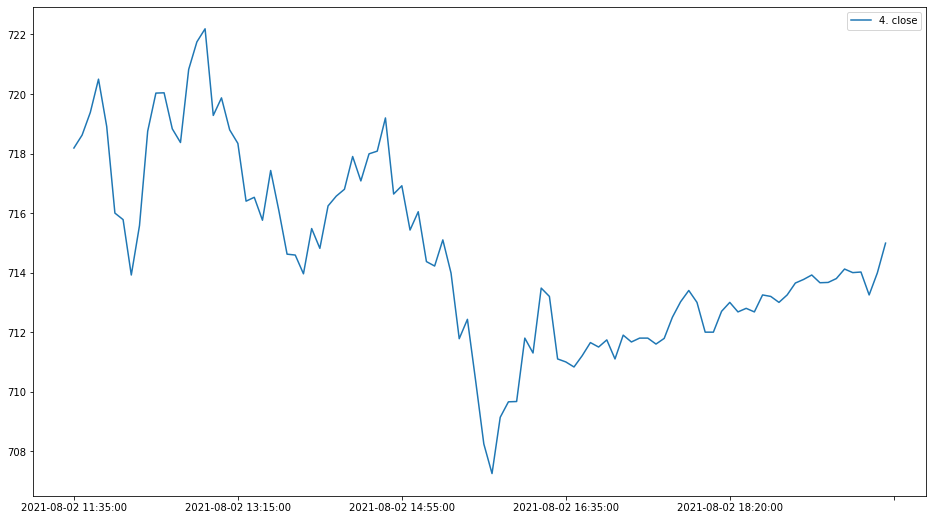

In [176]:
df.iloc[::-1].plot(figsize=(16,9))

---
## <font color='green'> Solutions: Share price API

Have a read through the API documentation here: 
    
https://www.alphavantage.co/documentation/
    
Can you figure out which **endpoint** or URL you need to get **daily** share prices for **Google** at **5 minute intervals**?
    
To do this, you'll need to sign up for an API key using this link: https://www.alphavantage.co/support/#api-key

(the 'demo' key we used in the previous example won't work)

In [ ]:
api_key = 'YOURKEYHERE'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GOOG&interval=5min&apikey='+api_key


In [ ]:
google_request = requests.get(url)

Now, check the status code of the request:

In [ ]:
google_request.status_code

Next, create a variable that contains the JSON returned by the API.

In [ ]:
google_json = google_request.json()

Use your Pandas knowledge to convert this into a Pandas dataframe and calculate the average opening share price.

In [ ]:
df = pd.DataFrame(google_json['Time Series (5min)']).transpose()
df.head()

In [ ]:
df['1. open'].mean()

---

## <font color='red'> Exercise: Police API
    
Let's experiment with the Police UK API. The documentation is here: https://data.police.uk/docs/

1. Using the documentation for the Police API, find out how to construct an API request to retrieve details of **stop and searches** in **London** during **May 2019** 

(hint: depending on which **API endpoint** you decide to use, you'll either need to look up the latitude and longitude of London using Google Maps or specify that you're interested in the `metropolitan` police force)


2. Make this API request in your browser and inspect the results visually. What information is being returned?


3. Convert the results to a Pandas DataFrame, and determine the total number of stop and searches recorded for this period.


4. Calculate the breakdown of people of different ethnic backgrounds who were stopped and searched.


5. Calculate the breakdown of people of different age brackets who were stopped and searched.



## <font color='green'> Solutions: Police API
    
Let's experiment with the Police UK API. The documentation is here: https://data.police.uk/docs/

1. Using the documentation for the Police API, find out how to construct an API request to retrieve details of **stop and searches** in **London** during **May 2019** 

(hint: depending on which **API endpoint** you decide to use, you'll either need to look up the latitude and longitude of London using Google Maps or specify that you're interested in the `metropolitan` police force)


2. Make this API request in your browser and inspect the results visually. What information is being returned?


3. Convert the results to a Pandas DataFrame, and determine the total number of stop and searches recorded for this period.


4. Calculate the breakdown of people of different ethnic backgrounds who were stopped and searched.


5. Calculate the breakdown of people of different age brackets who were stopped and searched.



In [ ]:
url = 'https://data.police.uk/api/stops-force?force=metropolitan&date=2019-05'
police_json = requests.get(url).json()

In [ ]:
police_df = pd.DataFrame(police_json)
police_df.head()

In [ ]:
police_df.shape

In [ ]:
police_df['officer_defined_ethnicity'].value_counts()

In [ ]:
police_df['self_defined_ethnicity'].value_counts()